<a href="https://colab.research.google.com/github/Shaadalam9/Shaadalam9/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784")

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
x=mnist["data"]
y=mnist["target"]
y=y.astype(np.uint8)
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

**BINARY CLASSIFICATION**

In [5]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [6]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()

In [7]:
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
some_digit=x[0]
sgd_clf.predict([some_digit])

array([False])

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.9645, 0.9609, 0.9637])

In [10]:
from sklearn.base import BaseEstimator
class Never5classifier(BaseEstimator):
  def fit(self,x,y=None):
    pass
  def predict(self,x):
    return np.zeros((len(x),1),dtype=bool)

In [11]:
never_5_clf=Never5classifier()
cross_val_score(never_5_clf,x_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3) 

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[54130,   449],
       [ 1931,  3490]])

In [14]:
confusion_matrix(y_train_5,y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [15]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred),recall_score(y_train_5,y_train_pred)

(0.886011678090886, 0.6437926581811474)

In [16]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7457264957264957

In [17]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([-289.14311111])

In [18]:
threshold=0
y_some_digit_pred=(y_scores>threshold)

In [19]:
threshold=8000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

In [20]:
y_scores=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method="decision_function")

In [21]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

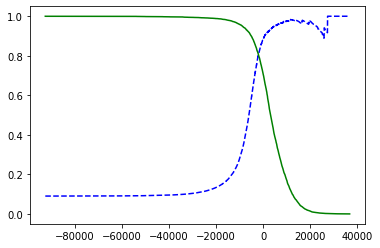

In [22]:
def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
  plt.plot(thresholds,precision[:-1],"b--",label="Precision")
  plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
  [...]
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [23]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.9)]
threshold_90_precision

641.4310137019633

In [24]:
y_train_pred_90=(y_scores>=threshold_90_precision)

In [25]:
precision_score(y_train_5,y_train_pred_90),recall_score(y_train_5,y_train_pred_90)

(0.9001733960862026, 0.6703560228740085)

In [26]:
from sklearn.metrics import roc_curve

In [27]:
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

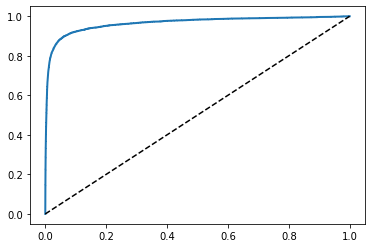

In [28]:
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.plot([0,1],[0,1],"k--")
  [...]
plot_roc_curve(fpr,tpr)
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method="predict_proba")

In [30]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

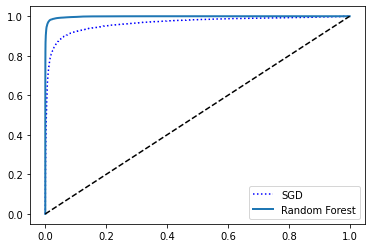

In [31]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [34]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [35]:
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

Decision function tell us about the threshold of the prediction .

In [36]:
sgd_clf.decision_function([some_digit])

array([[-21689.28794837, -35826.4365244 ,  -9836.23277351,
           188.00264485, -17866.62505445,   4643.02322959,
        -22909.10370908, -14125.15812867,  -9609.26180823,
        -17743.4912893 ]])

In [37]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring="accuracy")

array([0.8809 , 0.86145, 0.8852 ])

In [38]:
cross_val_score(forest_clf,x_train,y_train,cv=3, scoring="accuracy")

array([0.9646 , 0.96255, 0.9666 ])

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.8994 , 0.8964 , 0.90165])

In [41]:
y_train_pred=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5580,    0,   22,    6,    9,   51,   37,    6,  211,    1],
       [   0, 6404,   37,   25,    4,   46,    4,    7,  205,   10],
       [  27,   26, 5238,   97,   73,   28,   67,   39,  354,    9],
       [  21,   17,  116, 5249,    2,  212,   27,   40,  375,   72],
       [  12,   14,   48,   11, 5188,   13,   35,   26,  328,  167],
       [  27,   15,   30,  172,   53, 4470,   74,   15,  507,   58],
       [  29,   16,   44,    3,   42,   96, 5561,    3,  123,    1],
       [  20,   11,   52,   31,   49,   12,    3, 5697,  176,  214],
       [  16,   63,   46,   93,    3,  133,   27,   10, 5417,   43],
       [  23,   18,   30,   67,  120,   35,    1,  178,  347, 5130]])

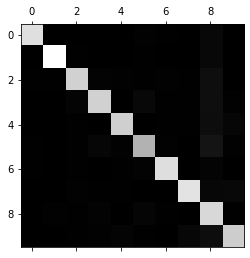

In [42]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [43]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

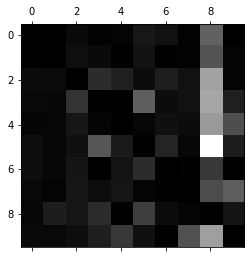

In [44]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()